### Credit Card Churn Prediction

As a Bank manager, you would like to create a model that could predict whether a credit card user will churn or not based on the below attributes


Attributes
    - CLIENTNUM	-- Client number. Unique identifier for the customer holding the account<br/>
    - Attrition_Flag -- Internal event (customer activity) variable - if the account is closed then 1 else 0<br/>
    - Customer_Age	-- Demographic variable - Customer's Age in Years<br/>
    - Gender -- Demographic variable - M=Male, F=Female<br/>
    - Dependent_count	-- Demographic variable - Number of dependents<br/>
    - Education_Level	-- Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)<br/>
    - Marital_Status	-- Demographic variable - Married, Single, Divorced, Unknown<br/>
    - Income_Category	-- Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, ><br/>
    - Card_Category	-- Product Variable - Type of Card (Blue, Silver, Gold, Platinum)<br/>
    - Monthsonbook	-- Period of relationship with bank<br/>
    - TotalRelationshipcount	-- Total no. of products held by the customer<br/>
    - MonthsInactive12_mon	-- No. of months inactive in the last 12 months<br/>
    - ContactsCount12_mon	-- No. of Contacts in the last 12 months<br/>
    - Credit_Limit	-- Credit Limit on the Credit Card<br/>
    - TotalRevolvingBal	-- Total Revolving Balance on the Credit Card<br/>
    - AvgOpenTo_Buy	-- Open to Buy Credit Line (Average of last 12 months)<br/>
    - TotalAmtChngQ4Q1	-- Change in Transaction Amount (Q4 over Q1)<br/>
    - TotalTransAmt	-- Total Transaction Amount (Last 12 months)<br/>
    - TotalTransCt	-- Total Transaction Count (Last 12 months)<br/>
    - TotalCtChngQ4Q1	-- -- Change in Transaction Count (Q4 over Q1)<br/>
    - AvgUtilizationRatio	Average Card Utilization Ratio<br/>


Source:
[Kaggle](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?resource=download)

In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mutual_info_score, make_scorer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time
pd.set_option("display.MAX_COLUMNS", None)

In [2]:
file_path = r'../../data/BankChurners.csv'

In [3]:
# read the input file
df = pd.read_csv(file_path, sep=",", encoding="latin1")

In [4]:
# number of records
df.shape

(10127, 23)

In [5]:
# top 5 records
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
# proportion missing
df.isnull().mean()

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [7]:
# dtypes
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [8]:
df["Gender"].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [9]:
# summary of numeric fields
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [10]:
# unique count of Education
df["Education_Level"].nunique()

7

In [11]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [12]:
# unique count of Income
df["Income_Category"].nunique()

6

In [13]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [14]:
# unique count of Marital_Status
df["Marital_Status"].nunique()

4

In [15]:
df["Marital_Status"].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
df["Attrition_Flag"].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [17]:
# duplicates?
df.duplicated().sum()

0

### Conclusion

1) The dataset is very small - 10127 users with 23 attributes.<br/>
2) There are no duplicates or missing values in the dataset.<br/>
3) Representation of women is at 52%.<br/>
4) Age range of the buyers vary from 26 - 73 years with 75% of the users being under 52 years.<br/>
5) There are 3561(35%) users in the `Less than $40K` Income category.<br/>
6) Mean number of dependents is 2.<br/>
7) Mean number of months on book is 39.<br/>
8) Mean Credit limit is $8631.<br/>
9) Married users make up most of the users at 46%(4687).<br/>
10) About 16% of the users have attrited.

For the purposes of this project, I will be filtering several unwanted features as I don't think a new Credit
card user would have built enough history with the Bank to make those features useful.

In [18]:
cols_to_keep = [
    "CLIENTNUM",
    "Attrition_Flag",
    "Customer_Age",
    "Dependent_count",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Months_on_book",
    "Total_Relationship_Count",
    "Credit_Limit",
    "Total_Revolving_Bal"
]

In [19]:
# take a subset of the columns
new_df = df[cols_to_keep].copy()

In [20]:
def clean_names():
    """Rename some of the columns in the DataFrame"""
    col_rename = {
        "CLIENTNUM": "client_num",
        "Attrition_Flag": "attrition_flag",
        "Customer_Age": "customer_age",
        "Dependent_count": "dependent_count",
        "Gender": "gender",
        "Education_Level": "education_level",
        "Marital_Status": "marital_status",
        "Income_Category": "income_category",
        "Card_Category": "card_category",
        "Months_on_book": "months_on_book",
        "Total_Relationship_Count": "total_relationship_count",
        "Credit_Limit": "credit_limit",
        "Total_Revolving_Bal": "total_revolving_bal"
    }
    new_df.rename(columns=col_rename, inplace=True)

In [21]:
clean_names()

In [22]:
new_df.columns

Index(['client_num', 'attrition_flag', 'customer_age', 'dependent_count',
       'gender', 'education_level', 'marital_status', 'income_category',
       'card_category', 'months_on_book', 'total_relationship_count',
       'credit_limit', 'total_revolving_bal'],
      dtype='object')

### Plot some charts

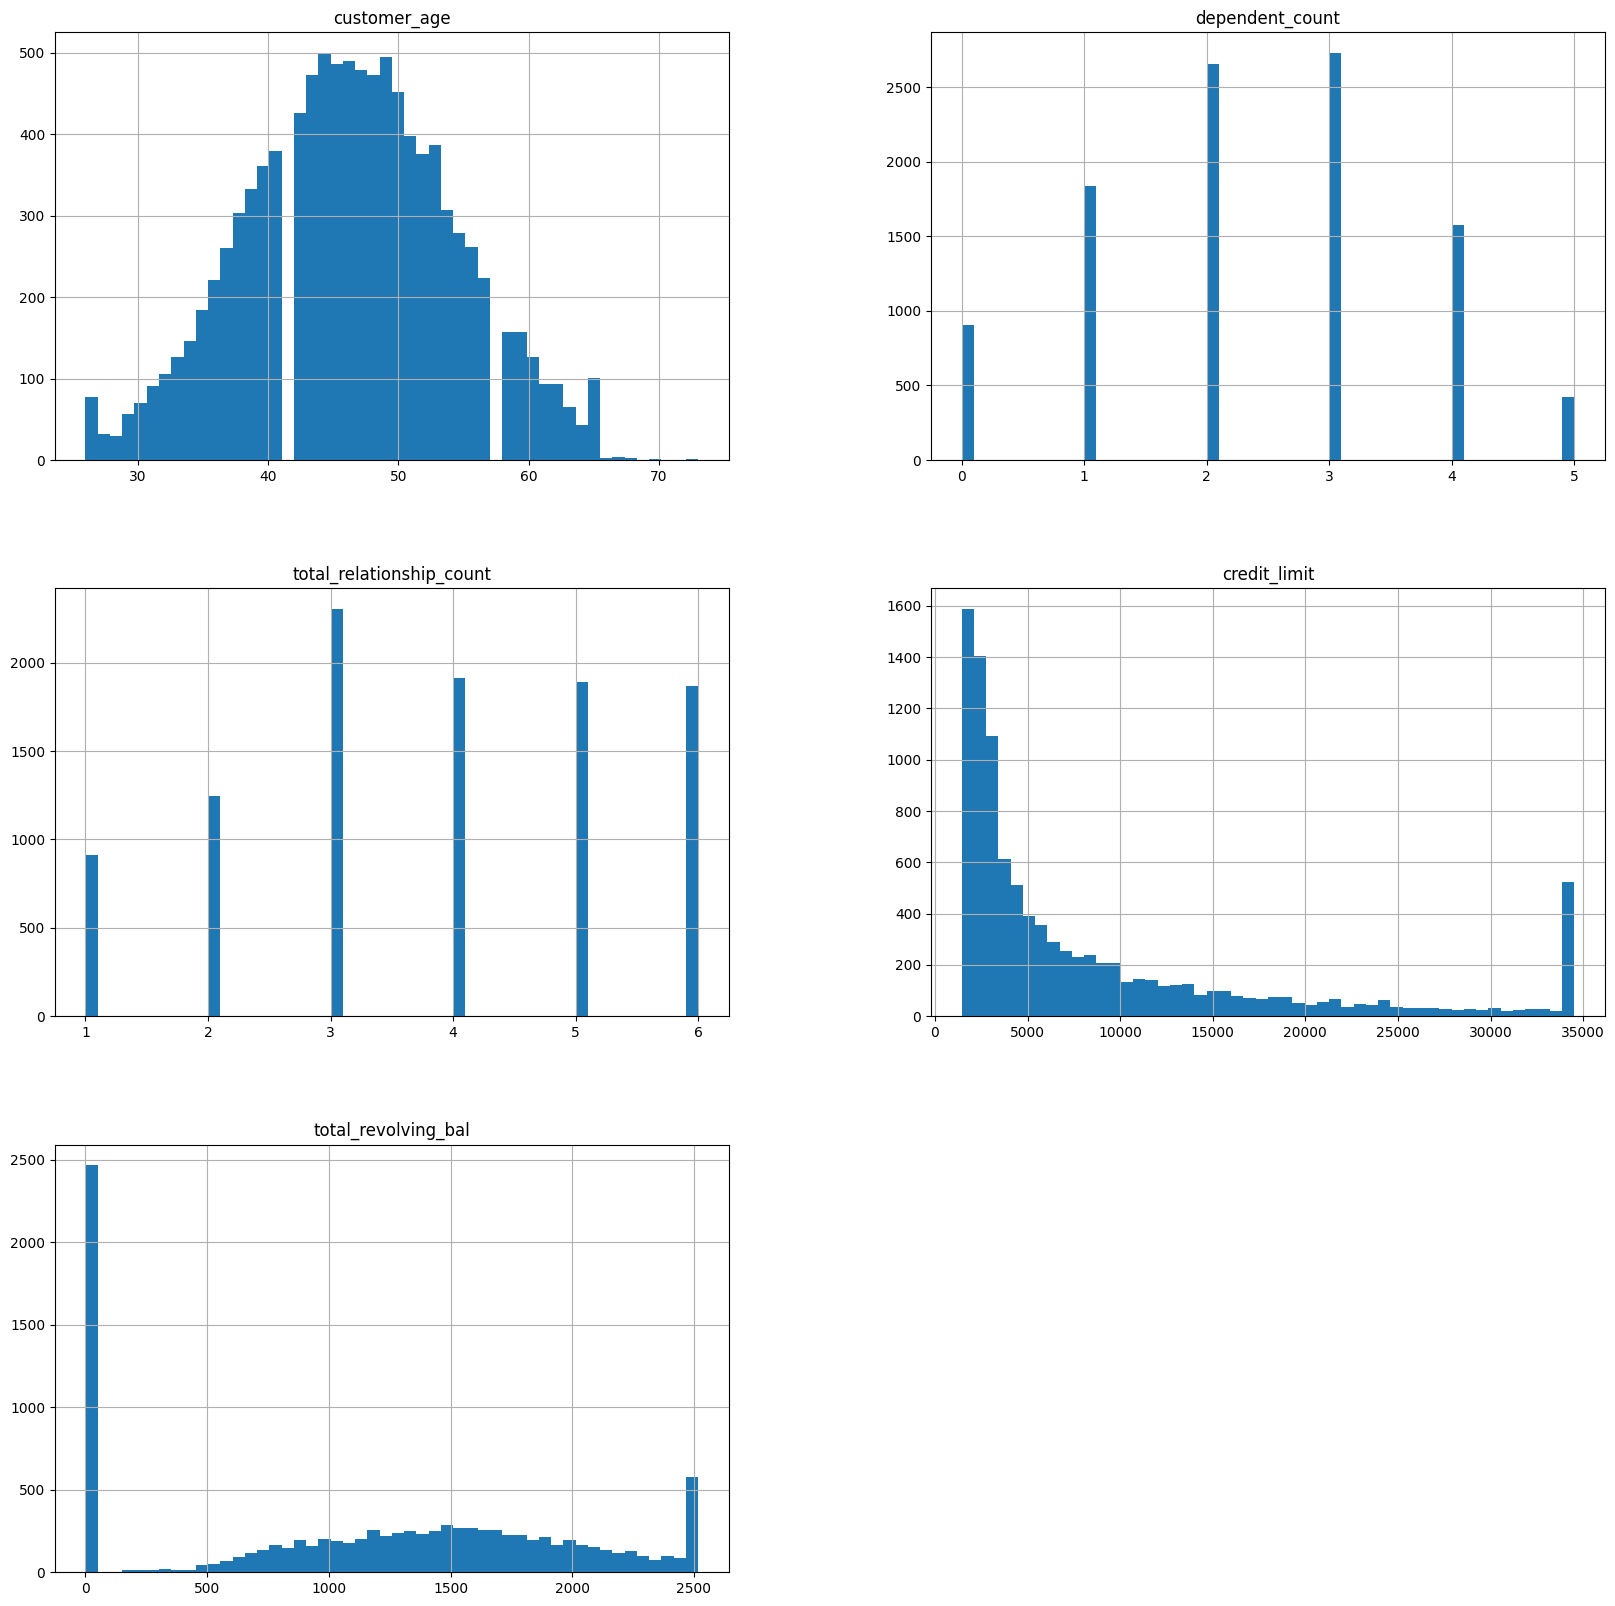

In [23]:
fields = ['customer_age', 'dependent_count', 'total_relationship_count', 'credit_limit', 'total_revolving_bal']
g = new_df[fields].hist(bins=50, figsize=(20, 20))
plt.show()

**Observeration**

Fields such as `credit_limit`, `total_revolving_bal` have outliers.

In [24]:
# correlation
new_df[fields].corr()

,customer_age,dependent_count,total_relationship_count,credit_limit,total_revolving_bal
customer_age,1.000000,-0.122254,-0.010931,0.002476,0.014780
dependent_count,-0.122254,1.000000,-0.039076,0.068065,-0.002688
total_relationship_count,-0.010931,-0.039076,1.000000,-0.071386,0.013726
credit_limit,0.002476,0.068065,-0.071386,1.000000,0.042493
total_revolving_bal,0.014780,-0.002688,0.013726,0.042493,1.000000


**Observation**

It appears that none of these variables have any correlation with one another

In [25]:
def calculate_mi(col):
    return mutual_info_score(new_df[col], new_df["attrition_flag"])

for col in new_df.select_dtypes(include="object").columns[1:]:
    print(f"Mutual info score for {col} is {calculate_mi(col)}")

Mutual info score for gender is 0.0006971784154832517
Mutual info score for education_level is 0.0005872709769945833
Mutual info score for marital_status is 0.0002991989693008276
Mutual info score for income_category is 0.0006466400381358317
Mutual info score for card_category is 0.00010367916242964891


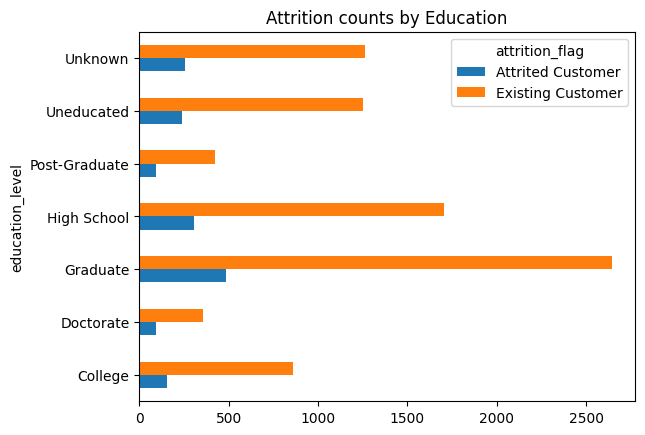

In [26]:
pd.crosstab(
    new_df["education_level"], 
    new_df["attrition_flag"]).\
    plot(kind="barh", 
        title="Attrition counts by Education")
plt.show()

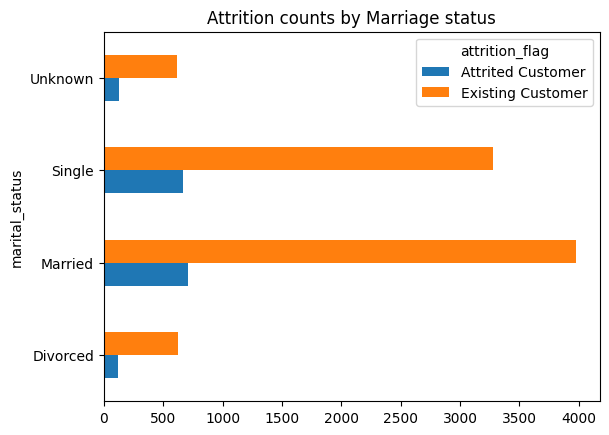

In [27]:
pd.crosstab(
    new_df["marital_status"], 
    new_df["attrition_flag"]).\
    plot(kind="barh", 
        title="Attrition counts by Marriage status")
plt.show()

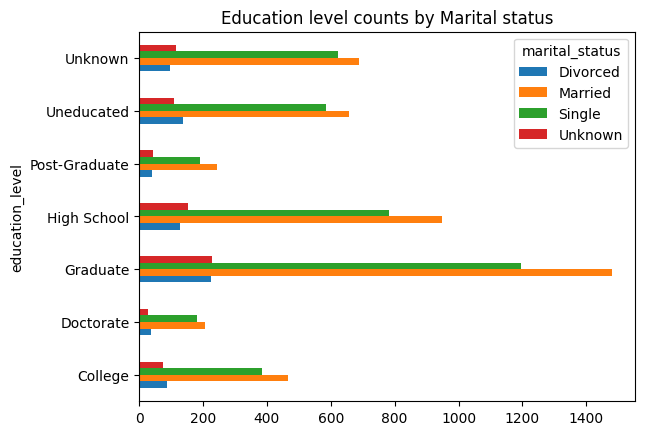

In [28]:
pd.crosstab(
    new_df["education_level"], 
    new_df["marital_status"]).\
    plot(kind="barh", 
        title="Education level counts by Marital status")
plt.show()

### Data preparation

In [29]:
dv = DictVectorizer(sparse=False)
oe = OrdinalEncoder(encoded_missing_value=-1)
scaler = StandardScaler()

In [30]:
def split_dataset(df, 
                  size1=0.2, 
                  size2=0.25, 
                  random_state=42
                 ):
    train_df, test_x = train_test_split(df, test_size=size1, random_state=random_state)
    train_x, val_x = train_test_split(train_df, test_size=size2, random_state=random_state)
    return train_x.reset_index(drop=True), val_x.reset_index(drop=True), test_x.reset_index(drop=True)

In [31]:
def data_prep(
    df, 
    split,
    is_ohe=False,
    is_train=True,
    is_drop=True
):
    """Prepare dataset"""
    df = split_dataset(df)[split]

    y = df["attrition_flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)
    try:
        df = df.drop(["client_num", "attrition_flag"], axis=1)
    except:
        pass
    if is_drop:
        try:
            for col in ["months_on_book", "total_relationship_count", "total_revolving_bal"]:
                del df[col]
        except:
            pass
    if not is_ohe:
        cat_fields = ["education_level", "marital_status", "income_category", "card_category"]
        if is_train:
            df[cat_fields] = oe.fit_transform(df[cat_fields])
        else:
            df[cat_fields] = oe.transform(df[cat_fields])
#     if is_education:
#         if is_train:
#             oe.fit(df["education_level"].values.reshape(-1, 1))
#         df["education_level"] = oe.transform(df["education_level"].values.reshape(-1, 1))
#     else:
#         del df["education_level"]
#     if is_marriage:
#         if is_train:
#             oe.fit(df["marital_status"].values.reshape(-1, 1))
#         df["marital_status"] = oe.transform(df["marital_status"].values.reshape(-1, 1))
#     else:
#         del df["marriage_status"]
#     if is_income:
#         if is_train:
#             oe.fit(df["income_category"].values.reshape(-1, 1))
#         df["income_category"] = oe.transform(df["income_category"].values.reshape(-1, 1))
#     else:
#         del df["income_category"]
#     if is_card:
#         if is_train:
#             oe.fit(df["card_category"].values.reshape(-1, 1))
#         df["card_category"] = oe.transform(df["card_category"].values.reshape(-1, 1))
#     else:
#         del df["card_category"]
    dicts = df.to_dict(orient='records')
    if is_train:
        dv.fit(dicts)
    df = dv.transform(dicts)
#     if is_train:
#         scaler.fit(df)
#     df = scaler.transform(df)
    df = pd.DataFrame(df, columns=dv.get_feature_names_out())

    return df, y

In [32]:
# train_x, val_x, test_x = split_dataset(new_df)

In [33]:
# train_x.shape, val_x.shape, test_x.shape

In [34]:
train_x, train_y = data_prep(
    new_df, 
    0,
    is_drop=False,
    is_ohe=False
)
val_x, val_y = data_prep(
    new_df, 
    1,  
    is_train=False,
    is_drop=False,
    is_ohe=False
)
test_x, test_y = data_prep(
    new_df, 
    2,  
    is_train=False,
    is_drop=False,
    is_ohe=False
    
)

In [35]:
train_x.shape, val_x.shape, test_x.shape

((6075, 12), (2026, 12), (2026, 12))

In [36]:
train_x.head()

,card_category,credit_limit,customer_age,dependent_count,education_level,gender=F,gender=M,income_category,marital_status,months_on_book,total_relationship_count,total_revolving_bal
0,0.0,1438.3,42.0,5.0,5.0,1.0,0.0,4.0,2.0,36.0,6.0,0.0
1,0.0,2629.0,55.0,2.0,6.0,1.0,0.0,4.0,1.0,36.0,5.0,1476.0
2,0.0,3136.0,52.0,3.0,3.0,1.0,0.0,4.0,1.0,48.0,4.0,1103.0
3,0.0,7088.0,51.0,3.0,2.0,0.0,1.0,3.0,1.0,39.0,1.0,1750.0
4,0.0,5570.0,47.0,4.0,0.0,0.0,1.0,1.0,0.0,36.0,5.0,1858.0


In [37]:
def roc_auc_scorer(y_true, y_pred):
    """
    Make scorer to compute roc auc score
    """
    return roc_auc_score(y_true, y_pred)

In [38]:
def build_model(model, train_X, train_y, valid_X, valid_y, 
                hyperparameters={}, 
                scoring=None, cv=3, model_str=None, cat_features=[], verbose=False):
    """
    Build model
    """
    np.random.seed(42)
    best_rmse = 0
    start_time = time.time()
    
    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(train_X, train_y)
    if model_str == 'xgboost':
        gs.best_estimator_.fit(train_X, train_y, verbose=verbose)
#     elif model_str == "rf":
#         gs.best_estimator_.fit(train_X, train_y)
    else:
        gs.best_estimator_.fit(train_X, train_y)
    preds = gs.best_estimator_.predict(valid_X)
    best_roc_auc = roc_auc_score(valid_y, preds)
    end_time = time.time() - start_time
    return gs.best_estimator_, best_roc_auc, np.round(end_time, 2)

In [39]:
lr = LogisticRegression(solver="liblinear", class_weight='balanced', random_state=42)
best_lr_model, best_lr_roc_auc, best_lr_time = build_model(lr, train_x, train_y, 
                                                        val_x, val_y,
                                                        hyperparameters={"C": [.01, .1, 1]}, 
                scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5, model_str="lr")

In [40]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
best_rf_model, best_rf_roc_auc, best_rf_time = build_model(rf, train_x, train_y, 
                                                        val_x, val_y,
                                                        hyperparameters={'n_estimators': [3, 5, 7]}, 
                scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5, model_str="rf")

In [41]:
xgb = XGBClassifier(learning_rate=.1, objective='reg:logistic', random_state=42)
best_xgb_model, best_xgb_roc_auc, best_xgb_time = build_model(xgb, train_x, train_y, 
                                                        val_x, val_y,
                                                        hyperparameters={'n_estimators': [3, 5, 7]}, 
                scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5, model_str="xgboost"
                                                          )

In [42]:
model_results_df = pd.DataFrame({'model': ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier'],
              'best_roc_auc_score': [best_lr_roc_auc, best_rf_roc_auc, best_xgb_roc_auc],
              'train_time': [best_lr_time, best_rf_time, best_xgb_time]})

In [43]:
model_results_df

,model,best_roc_auc_score,train_time
0,LogisticRegression,0.692882,0.35
1,RandomForestClassifier,0.573398,0.47
2,XGBClassifier,0.607632,0.50


### Model analysis

In [44]:
def test_prediction(model, test_X, test_y):
    """
    Predict RMSE on the test set
    """
    start_time = time.time()
    preds = model.predict(test_X)
    return np.round(time.time(), 2) - np.round(start_time, 2), roc_auc_score(test_y, preds)

In [45]:
models = [best_lr_model, best_rf_model, best_xgb_model]
model_names = ["LogReg", "RandomForest", "XGB"]
for model, name in zip(models, model_names):
    pred_time, best_roc_auc = test_prediction(model, test_x, test_y)
    print(f'The ROC AUC score on the test set is {best_roc_auc} using {name}, and time to predict {pred_time} seconds')

The ROC AUC score on the test set is 0.6612371371538934 using LogReg, and time to predict 0.0 seconds
The ROC AUC score on the test set is 0.5907837493902691 using RandomForest, and time to predict 0.009999990463256836 seconds
The ROC AUC score on the test set is 0.615779564521674 using XGB, and time to predict 0.0 seconds


### Conclusion

Nothing beats the simplicity of Logistic Regression for this small dataset. While One Hot Encoding (OHE) improves the AUC score on the validation dataset; it overfits on the test set. Not scaling the dataset andactually improved the ROC AUC score by ~1%.